# Hawkes Processes

## Percolation Strength plots

### Algorithm

In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def algorithm(rate, mu, n):
    """
    Algorithm that computes interevent times and Hawkes intensity

    #Output: rate x_k, x_k
    """                                    
    # Paso 1
    u1 = np.random.uniform()
    if mu == 0:
        F1 = np.inf
    else:
        F1 = -np.log(u1) / mu

    # Paso 2
    u2 = np.random.uniform()
    if (rate - mu) == 0:
        G2 = 0
    else:
        G2 = 1 + np.log(u2) / (rate - mu)
        

    # Paso 3
    if G2 <= 0:
        F2 = np.inf
    else:
        F2 = -np.log(G2)

    # Paso 4
    xk = min(F1, F2)

    # Paso 5
    rate_tk = (rate - mu) * np.exp(-xk) + n + mu
    return rate_tk, xk 

In [75]:
def generate_series(K, n, mu):
    """
    Generates temporal series for K Hawkes processes
    
    ##Inputs:
    K: Number of events
    n: Strength of the Hawkes process
    mu: Background intensity 

    ##Output:
    times: time series the events
    rate: time series for the intensity
    """
    times_between_events = [0]
    rate = [mu]
    for _ in range(K):
        rate_tk, xk = algorithm(rate[-1], mu, n)
        rate.append(rate_tk)
        times_between_events.append(xk)
    times = np.cumsum(times_between_events)
    return times_between_events, times, rate

In [76]:
def calculate_percolation_strength(times_between_events, deltas):
    percolation_strengths = []

    for delta in deltas:
        cluster_sizes = []
        # Initialize the size of the current cluster
        current_cluster_size = 1 # The first event is always a cluster

        for i in range(len(times_between_events)):
            if times_between_events[i] <= delta:
                current_cluster_size += 1
            else:
                if current_cluster_size > 1: # Only consider clusters with more than one event
                    cluster_sizes.append(current_cluster_size)
                # Reset the size of the current cluster
                current_cluster_size = 1 # The next event is always a cluster

        # Add the size of the last cluster
        if current_cluster_size > 1: # Only consider clusters with more than one event
            cluster_sizes.append(current_cluster_size)

        max_cluster_size = max(cluster_sizes) 

        percolation_strengths.append(max_cluster_size / len(times_between_events))
    return percolation_strengths

### My function to calculate percolation strength

We are going to plot the percolation plots for $K=10^6$ events and different configurations of $\mu$ nad $n$

### First configuration $\mu=1$, $n=0$

In [77]:
K = 10**6
n = 0
mu = 1
times_between_events, times, rate = generate_series(K, n, mu)

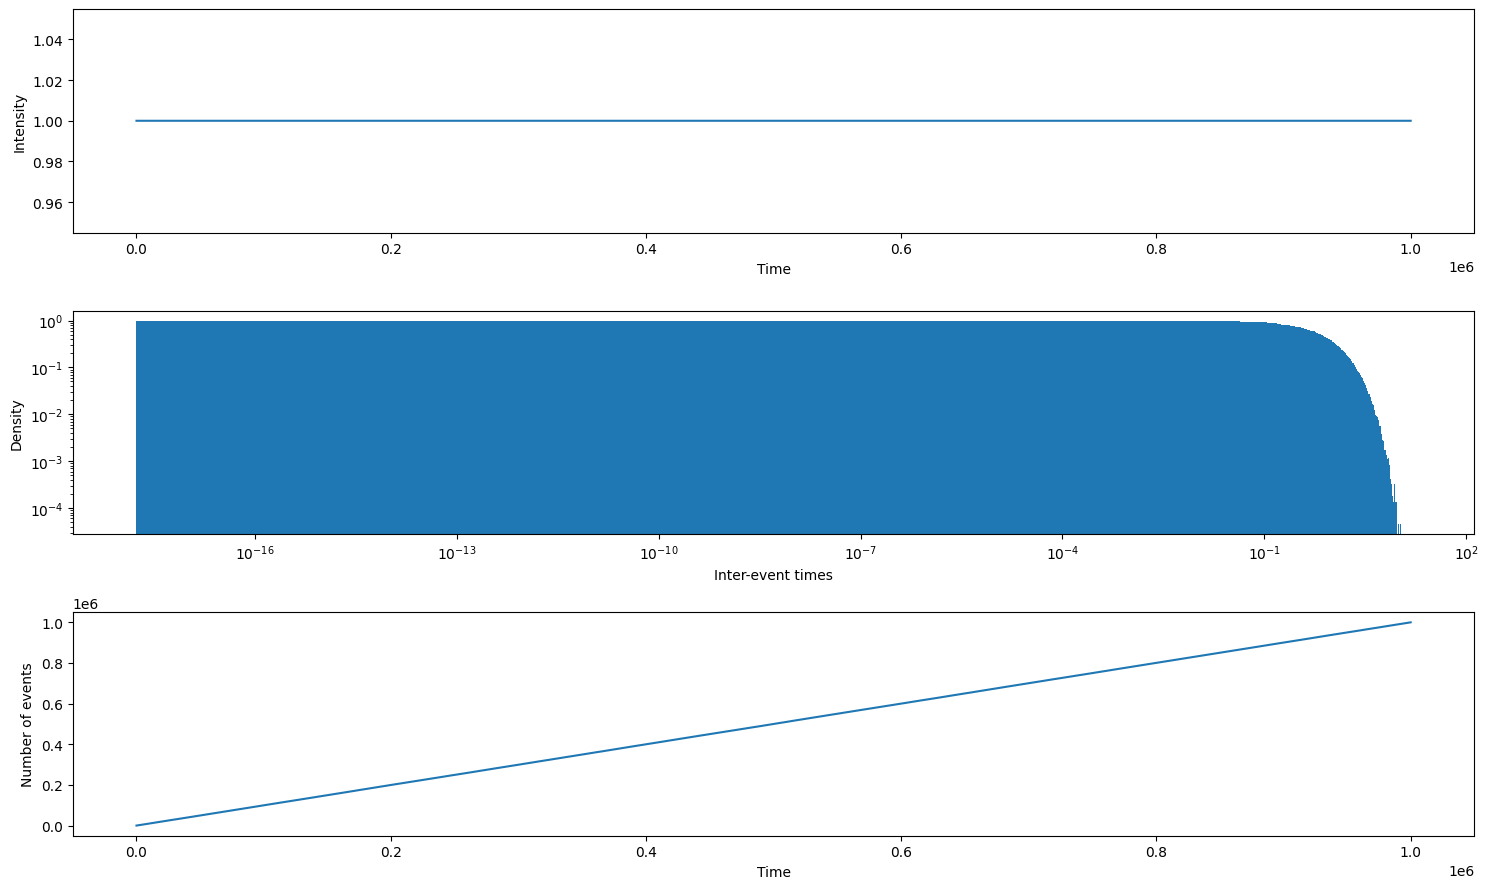

In [78]:
fig = plt.figure(figsize=(15, 9))
axgrid = fig.add_gridspec(3, 1)

ax0 = fig.add_subplot(axgrid[0, 0])
ax0.plot(times, rate)
ax0.set_xlabel('Time')
ax0.set_ylabel('Intensity')

ax1 = fig.add_subplot(axgrid[1, 0])
ax1.hist(times_between_events, bins = 'auto', density = True)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Inter-event times')
ax1.set_ylabel('Density')

ax2 = fig.add_subplot(axgrid[2, 0])
ax2.plot(times, np.arange(0,len(times)))
ax2.set_xlabel('Time')
ax2.set_ylabel('Number of events')

fig.tight_layout()

In [79]:
deltas = np.logspace(0, 2, num = 10000, base = 10)
percolation_strength = calculate_percolation_strength(times_between_events, deltas)

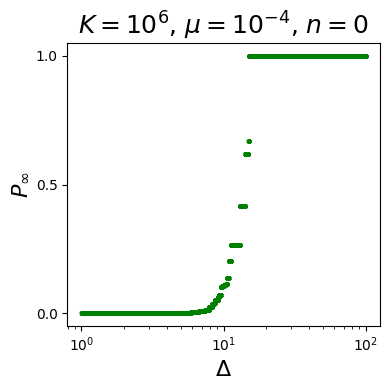

In [80]:
plt.figure(figsize=(4, 4))
plt.scatter(deltas, percolation_strength, color = 'green', marker = 'x', s = 5)
plt.xscale('log')
plt.yticks([0,0.5,1.0])
plt.xlabel('$\Delta$', fontsize = 16)
plt.ylabel('$P_{\infty}$', fontsize = 16)
plt.title(f'$K=10^6$, $\mu = 10^{{-4}}$, $n = {n}$', fontsize = 18)
plt.tight_layout()

### Now the parameters are $K=10^6$ events, $\mu=10^{-4}$ and $n=1$ 

In [81]:
n = 1
mu = 10**-4
times_between_events, times, rate = generate_series(K, n, mu)

In [82]:
fig = plt.figure(figsize=(15, 9))
axgrid = fig.add_gridspec(3, 1)

ax0 = fig.add_subplot(axgrid[0, 0])
ax0.plot(times, rate)
ax0.set_xlabel('Time')
ax0.set_ylabel('Intensity')

ax1 = fig.add_subplot(axgrid[1, 0])
ax1.hist(times_between_events, bins = 'auto', density = True, log=True)
#ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.set_xlabel('Inter-event times')
ax1.set_ylabel('Density')

ax2 = fig.add_subplot(axgrid[2, 0])
ax2.plot(times, np.arange(0,len(times)))
ax2.set_xlabel('Time')
ax2.set_ylabel('Number of events')

fig.tight_layout()

In [ ]:
deltas = np.logspace(-4, 6, num = 10000, base = 10)
percolation_strength = calculate_percolation_strength(times_between_events, deltas)

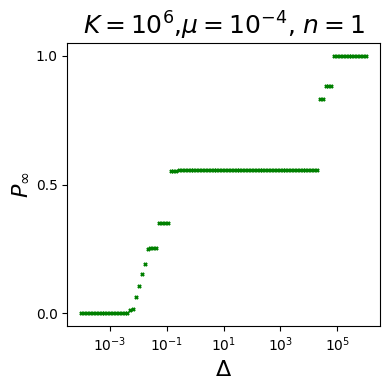

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(deltas, percolation_strength, color = 'green', marker = 'x', s = 5)
plt.xscale('log')
plt.yticks([0,0.5,1.0])
plt.xlabel('$\Delta$', fontsize = 16)
plt.ylabel('$P_{\infty}$', fontsize = 16)
plt.title(f'$K=10^6$,$\mu = 10^{{-4}}$, $n = {n}$', fontsize = 18)
plt.tight_layout()

### Finally, the parameters are $\mu=10^2$ and n=1

In [ ]:
n = 1
mu = 10**2
times_between_events, times, rate = generate_series(K, n, mu)

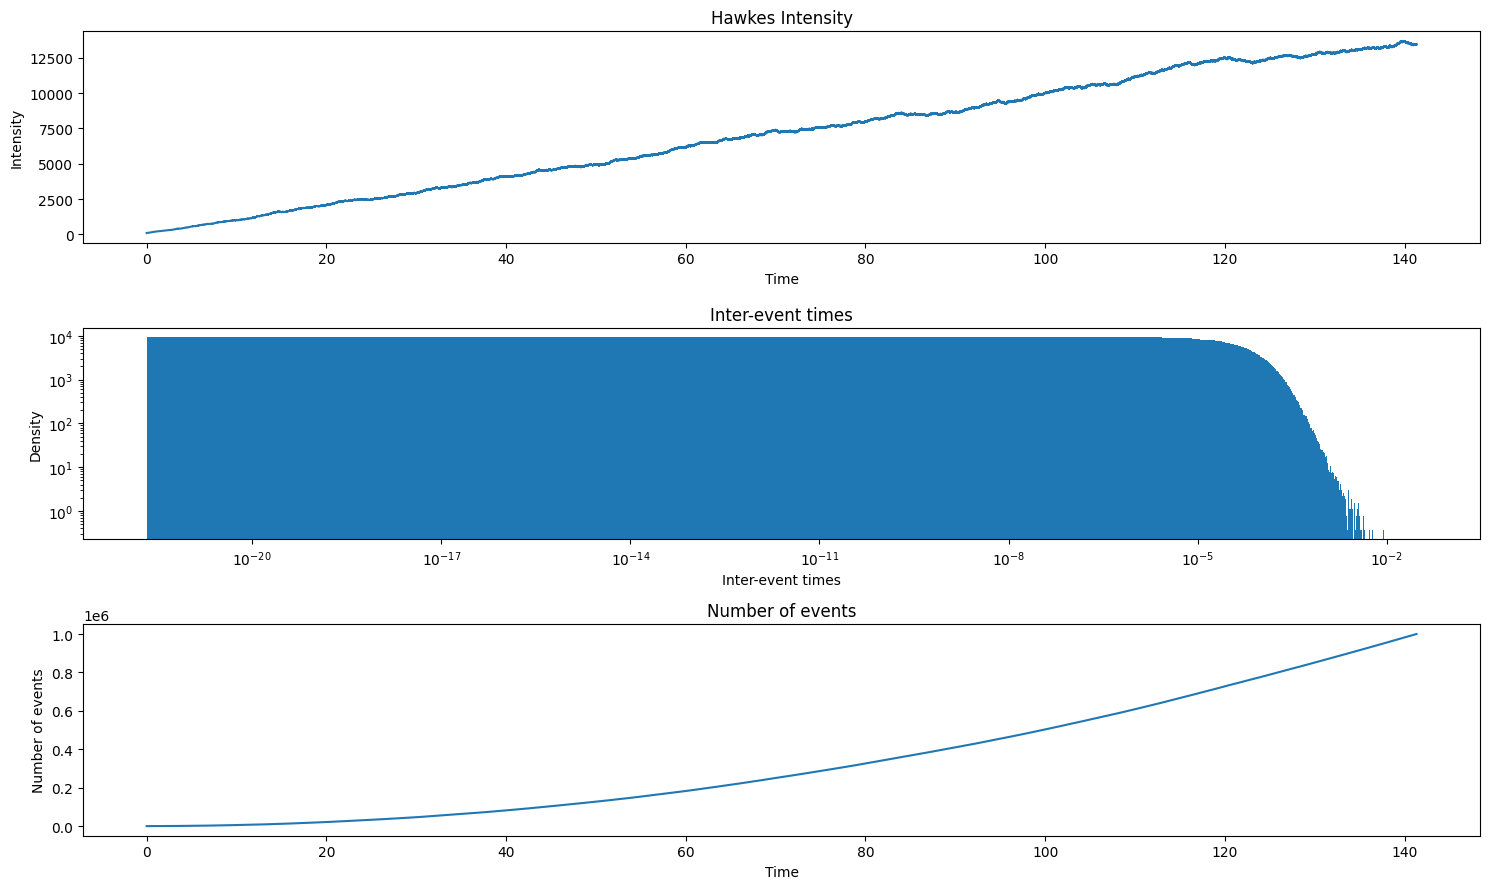

In [ ]:
fig = plt.figure(figsize=(15, 9))
axgrid = fig.add_gridspec(3, 1)

ax0 = fig.add_subplot(axgrid[0, 0])
ax0.plot(times, rate)
ax0.set_xlabel('Time')
ax0.set_ylabel('Intensity')
ax0.set_title('Hawkes Intensity')

ax1 = fig.add_subplot(axgrid[1, 0])
ax1.hist(times_between_events, bins = 'auto', density = True)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Inter-event times')
ax1.set_ylabel('Density')
ax1.set_title('Inter-event times')

ax2 = fig.add_subplot(axgrid[2, 0])
ax2.plot(times, np.arange(0,len(times)))
ax2.set_xlabel('Time')
ax2.set_ylabel('Number of events')
ax2.set_title('Number of events')

fig.tight_layout()

In [ ]:
deltas = np.logspace(-4, -1, num = 10000, base = 10)
percolation_strength = calculate_percolation_strength(times_between_events, deltas)

KeyboardInterrupt: 

ValueError: x and y must be the same size

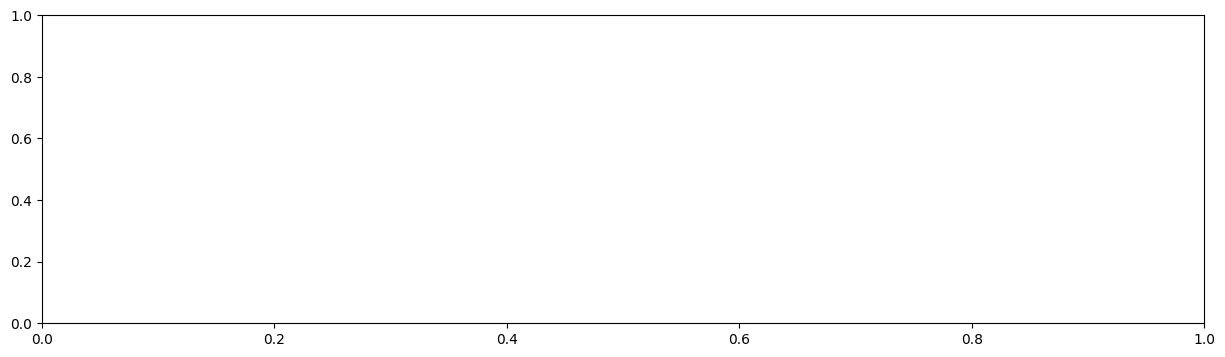

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(deltas, percolation_strength, color = 'green', marker = 'x', s = 5)
plt.xscale('log')
plt.yticks([0,0.5,1.0])
plt.xlabel('$\Delta$', fontsize = 16)
plt.ylabel('$P_{\infty}$', fontsize = 16)
plt.title(f'$K=10^6$, $\mu = 10^{{-4}}$, $n = {n}$', fontsize = 18)
plt.tight_layout()

## This is from the pruebas.ipynb notebook

Repeat the process a given number of iterations to calculate the mean and smooth the curve

In [ ]:
percolation_strengths_list = []
n_iters = 10
deltas = np.logspace(-2, 3, num=500, base=10)
for _ in range(n_iters):
    percolation_strength = calculate_percolation_strength(times, deltas)
    percolation_strengths_list.append(percolation_strength)
    #print(f'Iteration {_} done')
mean_percolation_strengths = np.mean(percolation_strengths_list, axis=0)


plt.figure(figsize=(15, 6))
plt.plot(deltas, mean_percolation_strengths, color = 'purple', marker='x', ms=5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength', fontsize=15)
plt.title(f'Percolation plot for $\mu=${mu} for $M=${n_iters} iterations', fontsize=16)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

## Copilot function (incomplete)

Add an if to count the largest cluster, a cluster begins with a 0 (False) and ends with a 1 (True). The 0 identifies the start of a cluster, we can locate them with np.where to see them and then subtract the indexes obtaining the cluster size and then the cluster duration.

In [ ]:
K = 10**6
n = 1
mu = 10**-4

times_between_events, times, rate = generate_series(K, n, mu)

deltas = np.logspace(-5, 1, num=1000, base=10)

percolations = []
for delta in deltas:
    percolations.append(np.sum((times_between_events) < delta)/K)

plt.figure(figsize=(15, 6))
plt.plot(deltas, percolations, marker = 'o', ms=0.5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength, $P_{\infty}$', fontsize=15)
plt.title('Percolation plot', fontsize=16)
plt.tight_layout()
plt.show()

Repeat the proces a given time of iterations to calculate the mean and smooth the curve

In [ ]:
percolation_means = []
percolation_strength_list = []
n_iters = 1000

for _ in range(n_iters):
    percolations = []
    for delta in deltas:
        percolations.append(np.sum((times_between_events) < delta)/K)
    percolation_strength_list.append(percolations)
    #print(_)
percolations_means = np.mean(percolation_strength_list, axis=0)

plt.figure(figsize=(15, 6))
plt.plot(deltas, percolations_means, marker = 'x', ms=0.5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength, $P_{\infty}$', fontsize=15)
plt.title('Percolation plot for $10^3$ iterations', fontsize=16)
plt.tight_layout()
plt.show()